In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pca_80 = pd.read_pickle('../data/cca/pca_80fve.pk')

In [4]:
pca_80.head()

,component,fve,fve_ratio,arch,depth,layer,objective,cum_fve
0,0,69.628601,0.059599,conv,4,conv_4,no-recon,0.059599
1,1,57.645645,0.049343,conv,4,conv_4,no-recon,0.108942
2,2,44.470741,0.038065,conv,4,conv_4,no-recon,0.147007
3,3,37.003548,0.031674,conv,4,conv_4,no-recon,0.178681
4,4,30.727896,0.026302,conv,4,conv_4,no-recon,0.204983


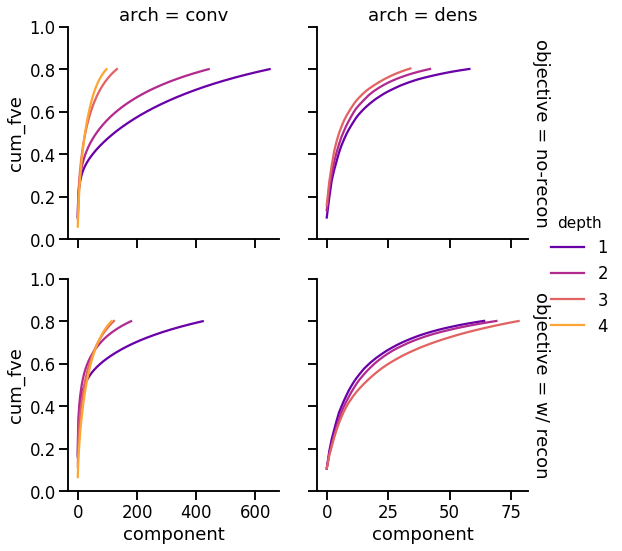

In [5]:
sns.set_context('talk')
g = sns.FacetGrid(data=pca_80,row='objective',col='arch',hue='depth',sharex='col',margin_titles=True,
                  ylim=(0,1),
                  height=4, palette='plasma',legend_out=True,
                 )
# plt.xscale('log')
g.map(sns.lineplot,'component','cum_fve').add_legend()

In [6]:
count_pca_80 = pca_80.groupby(['arch','objective','layer'])['fve'].count().reset_index().rename(columns={'fve':'n_components'})

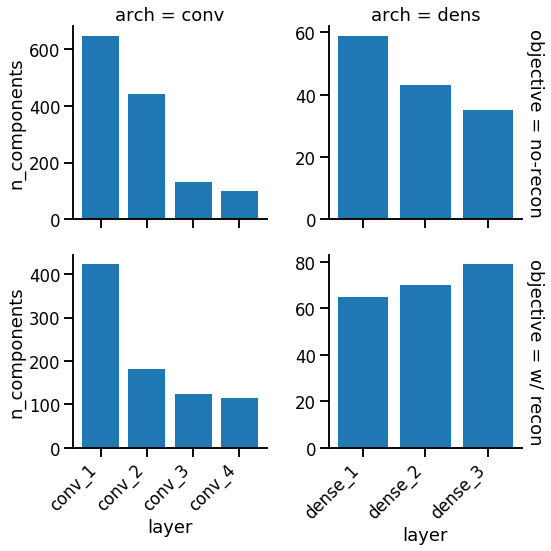

In [7]:
g = sns.FacetGrid(data=count_pca_80,col='arch',row='objective',sharex='col',sharey=False,margin_titles=True,
#                   ylim=(0,1),
                  height=4, palette='plasma',legend_out=True,
                 )
# plt.xscale('log')
g.map(plt.bar,'layer','n_components')
g.fig.autofmt_xdate(rotation=45)